# 영문 워드 클라우드

In [11]:
# NLTK(Natural Language Toolkit)
import nltk

In [3]:
# NLTK에서 사용하는 데이터는 다운로드 받아야 함
# VS Code: 1회 다운받으면 됨
#Colab: 접속할떄마다 다운받아야함

# 아래 링크따라들어가 all pakege에서 'punkt' 와 'stopwords' 다운로드
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt

- Stopwords 처리

In [15]:
#NLTK 
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
#WordCloud에서 제공하는 불용어(stopwords)
sw_wc = STOPWORDS
print(sw_wc)

{'can', 'before', "i'd", 'would', "they're", 'since', 'however', 'nor', 'was', "aren't", 'a', 'between', "where's", 'more', 'no', 'ourselves', 'whom', "why's", 'only', 'how', "you'd", "you're", 'yourself', 'once', 'out', "i'll", "don't", "you've", 'into', 'are', 'had', 'after', "wasn't", 'also', 'could', 'of', 'hence', 'to', 'does', 'cannot', 'it', 'my', "here's", 'our', 'too', "let's", 'having', 'such', 'yourselves', 'some', 'that', "there's", 'over', 'these', "we're", 'against', "she'd", 'each', "we'd", "doesn't", 'then', 'which', 'all', 'being', 'when', 'very', "hasn't", 'get', "we've", "isn't", 'most', "shan't", 'here', 'but', 'its', 'she', 'than', 'any', 'in', 'own', "he's", 'there', 'been', 'ever', 'her', "mustn't", "shouldn't", "what's", "wouldn't", 'did', 'we', 'just', 'other', 'through', "weren't", 'they', 'not', 'up', 'therefore', 'below', 'above', 'further', "couldn't", 'at', "it's", 'this', 'k', 'ought', "can't", 'with', 'your', 'the', "we'll", 'because', 'com', 'be', 'duri

In [17]:
len(sw_nltk), len(sw_wc)

(179, 192)

## 1.Alice in Wonderland

In [18]:
with open('data/Alice.txt') as file:
    text = file.read()

In [19]:
# stopword에 'said'단어 추가
sw_wc.add('said')

In [20]:
wc = WordCloud(background_color='white',
                max_words=2000, stopwords=sw_wc)#.generate(text) 여기에 붙혀도 된다
wc = wc.generate(text)

In [21]:
count = 0
for key,val in wc.words_.items():
    print(key,':', val)
    count += 1
    if count >10 :
        break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


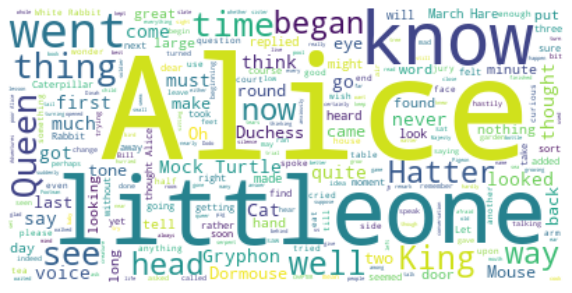

In [25]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림위에 표시하기

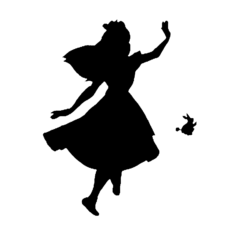

In [26]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
wc = WordCloud(background_color='white', mask=mask,
                max_words=1000, stopwords=sw_wc).generate(text)

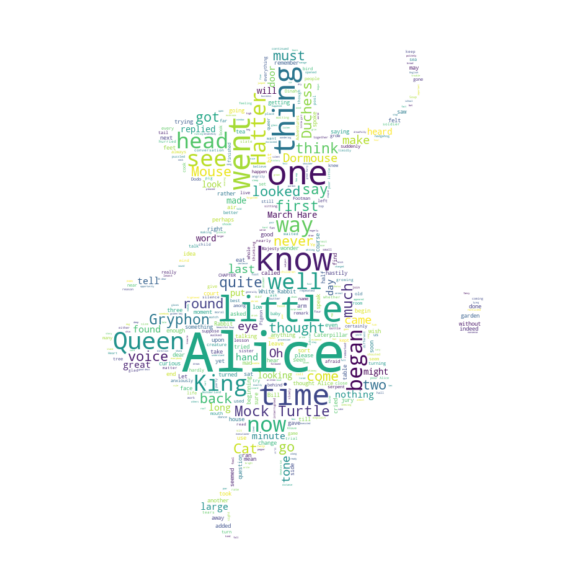

In [31]:
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2.Star Wars

In [32]:
with open('data/A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE's",'Luke')

In [34]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')

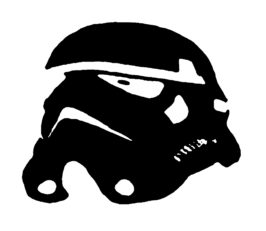

In [35]:
mask = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
wc = WordCloud(mask=mask,max_words=1000, stopwords=sw,
                margin=10, random_state=2022).generate(text)
default_colors = wc.to_array

In [39]:
#HSL : hue, saturation, lightness
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0,0%,{np.random.randint(60,101)}%)'

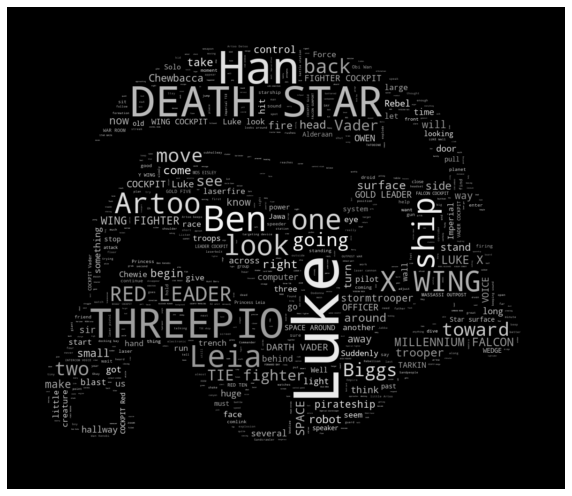

In [42]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2022),
            interpolation='bilinear')
plt.axis('off')
plt.show()